In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt


In [23]:
uploaded = files.upload()

# Print the keys of the uploaded dictionary
print(uploaded.keys())

# Load the dataset
data = pd.read_csv(io.BytesIO(uploaded['Crop_Dataset.csv']))

Saving Crop_Dataset.csv to Crop_Dataset.csv
dict_keys(['Crop_Dataset.csv'])


In [41]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('Label_Encoded', axis=1)
X = X.drop('Label', axis=1)
y = data['Label_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Initialize the Decision Tree model
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [45]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree model: {accuracy}')
y_test = np.array(y_test)
print(y_pred)
print(y_test)

Accuracy of Decision Tree model: 0.9772727272727273
[14 13 17 17 15 11 15  5  6  8  7 18  9 20 18  9 15  1 17 14 21 17 16 17
  2 20  6 16  4  0  9  5 20  8 20  7 20  2  2  3 17 11  7  1  6  1  4 18
 14  1  7 21 12  6 21  3 19 15 10  7 13 18  8 16 17  4 16  0 14  4 14 18
 20 10  7 17 10  6 13 16 21  2  0  5 16 11 21  5  7  9  1  5 19 17  4  5
  3 21  5  8 18  0 16 14 13  3 13 10  4  5 10 20 19  9  4  2  1 18  9  0
  4 12  7 18  2  7 18  1 10  5 20  3  9  2 18 16  4 10 10 15  3 14  6  7
 18 16 15 18  3  5  6  8 13  6  4  4  4  3  1 20  2 15 16 19  0 18 12  8
 13 12 12  7  9  2 18  1  8 12 13 20 21 21  3 20  5  3 10  3 18 17 17  6
 11  9 13  3  1 15  7  2 12 12 10 19  0  9  6 10 20  6  1  2  2  2 15  0
  3 17 21  7  3 11 11 18 17 15  2  9  2 14 15 14 14 11 11 19 18  9  0 14
 21 17  5  1 11 14  4  6 21 12 18 19  4  0 15  9 21  2 19 20 11 10 17 15
  2  0  4  5  6 20  9 12  5 20  1 18  1  2 10 20 18 20 11 14 15 10  4  7
 16  2 13 10 15  2 21  4 16 15 18 17 13  5 17  2  9  2 17  8 15  9  2 11

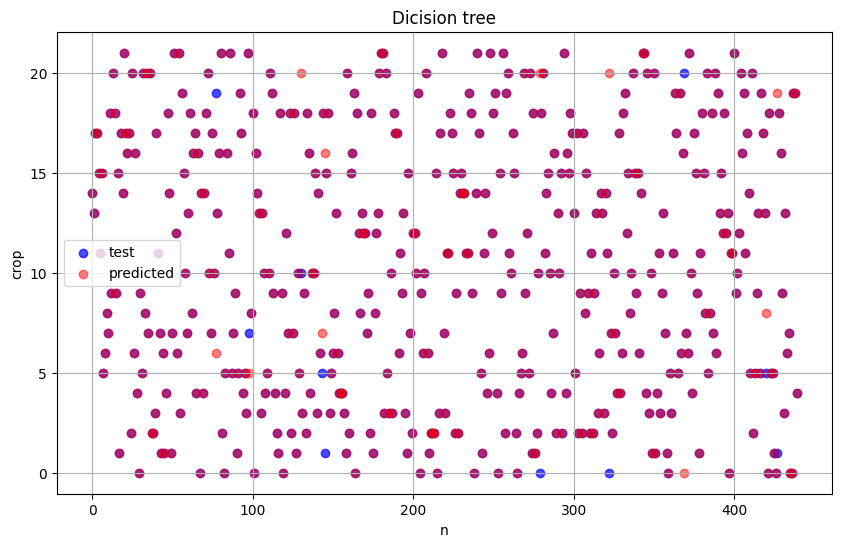

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='test', color='blue', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='predicted', color='red', alpha=0.5)
plt.grid()
plt.legend()
plt.title('Dicision tree')
plt.xlabel('n')
plt.ylabel('crop')
plt.show()

In [57]:
# Save the trained model as a joblib file
import joblib
joblib.dump(clf, 'decision_tree_model.joblib')

['decision_tree_model.joblib']